In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST
from tqdm.auto import tqdm

from matplotlib import pyplot as plt
from IPython.display import clear_output
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [2]:
print(torch.__version__)


2.6.0+cpu


In [3]:
train_mnist_data = MNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_mnist_data = MNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)

In [4]:
train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data, batch_size=32, shuffle=False, num_workers=2
)

Text(0.5, 1.0, 'Image label: 0')

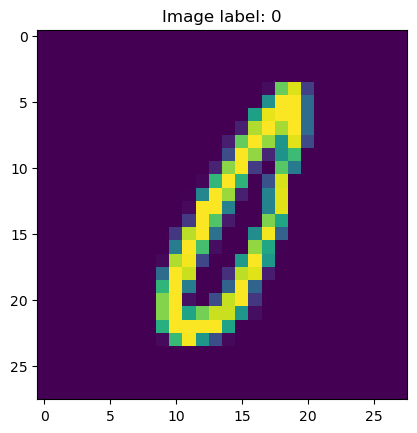

In [5]:
random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
# __________end of block__________

In [6]:
activation = nn.Mish

model = nn.Sequential()
model.add_module('l1', nn.Conv2d(1, 1, kernel_size=3, padding=(1, 1)))
model.add_module('activation1', activation())
model.add_module('l2', nn.Conv2d(1, 1, kernel_size=3, padding=(1, 1)))
model.add_module('activation1', activation())
model.add_module('l3', nn.Conv2d(1, 1, kernel_size=3, padding=(1, 1)))


# model = nn.Sequential()
# model.add_module('l1', nn.Conv2d(1, 1, kernel_size=5, padding=(2, 2)))
# model.add_module('activation1', activation())
# model.add_module('l2', nn.Conv2d(1, 1, kernel_size=5))
# model.add_module('activation1', activation())
# model.add_module('l3', nn.Conv2d(1, 1, kernel_size=5))


# nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2) 


# model.add_module('l1', nn.Linear(784, 256))
# model.add_module('activation1', activation())
# model.add_module('l2', nn.Linear(256, 256))
# model.add_module('activation2', activation())
# model.add_module('l3', nn.Linear(256, 32))
# model.add_module('activation3', activation())
# model.add_module('l4', nn.Linear(32, 16))
# model.add_module('activation4', activation())
# model.add_module('l5', nn.Linear(16, 32))
# model.add_module('activation5', activation())
# model.add_module('l6', nn.Linear(32, 256))
# model.add_module('activation6', activation())
# model.add_module('l7', nn.Linear(256, 256))
# model.add_module('activation7', activation())
# model.add_module('l8', nn.Linear(256, 784))



In [7]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 5
loss_func = nn.MSELoss(reduction='mean')

In [8]:
def train_model(model, train_loader, loss_fn, opt, n_epochs: int):
    train_loss = []
    val_loss = []
    val_accuracy = []
    input_im = []
    output_im = []
    
    for epoch in tqdm(range(n_epochs)):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []

        model.train(True) # enable dropout / batch_norm training behavior
        i = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            # move data to target device
            ### YOUR CODE HERE

            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            ### YOUR CODE HERE
            # print(X_batch.reshape(-1, 1, 28, 28).shape)
            y_pred = model(X_batch.reshape(-1, 1, 28, 28))
            # print(y_pred.shape)
            loss = loss_func(y_pred, X_batch.reshape(-1, 1, 28, 28))
            loss.backward()
            opt.step()
            opt.zero_grad()
            ep_train_loss.append(loss.item())

            if ((epoch == 0) and (i == 0)):
                input_im.append(X_batch.reshape(-1, 1, 28, 28))
                output_im.append(y_pred)

            i += 1
                
        model.train(False) # disable dropout / use averages for batch_norm
            


        train_loss.append(np.mean(ep_train_loss))
        # print(train_loss)
        # val_loss.append(np.mean(ep_val_loss))
        # val_accuracy.append(np.mean(ep_val_accuracy))

    return model, train_loss, input_im, output_im

In [9]:
model, train_loss, input_im, output_im = train_model(model, train_data_loader, loss_func, opt, n_epochs)

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
torch.save(model.state_dict(), 'model_weights_cnn.pth')

1
1
torch.Size([32, 1, 28, 28])


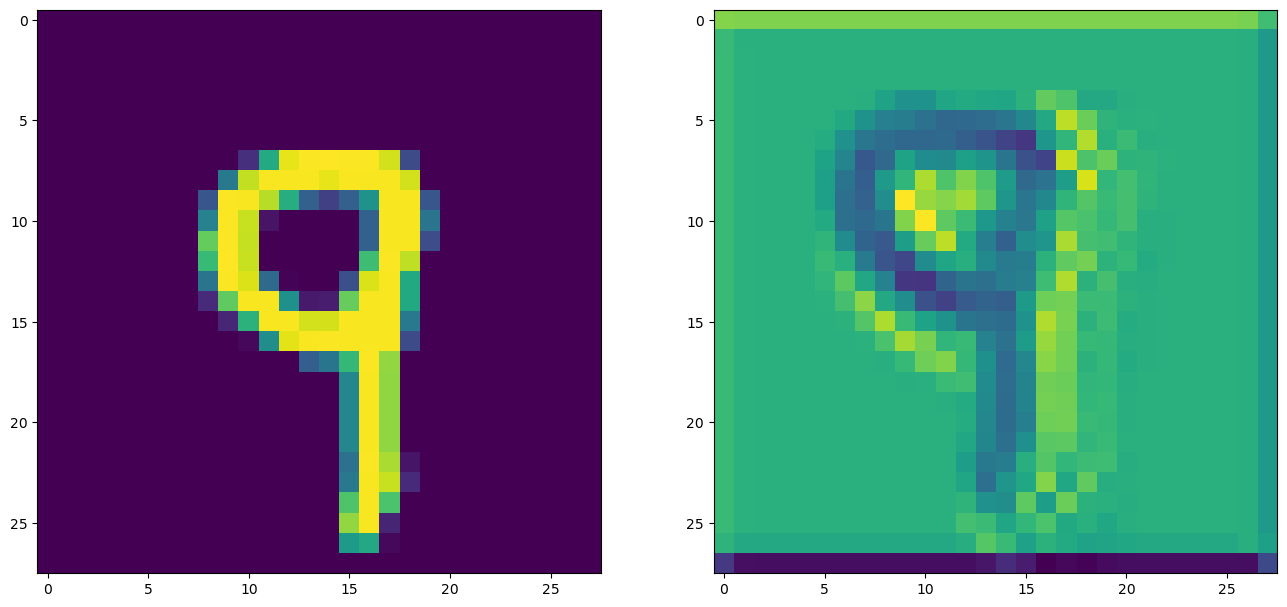

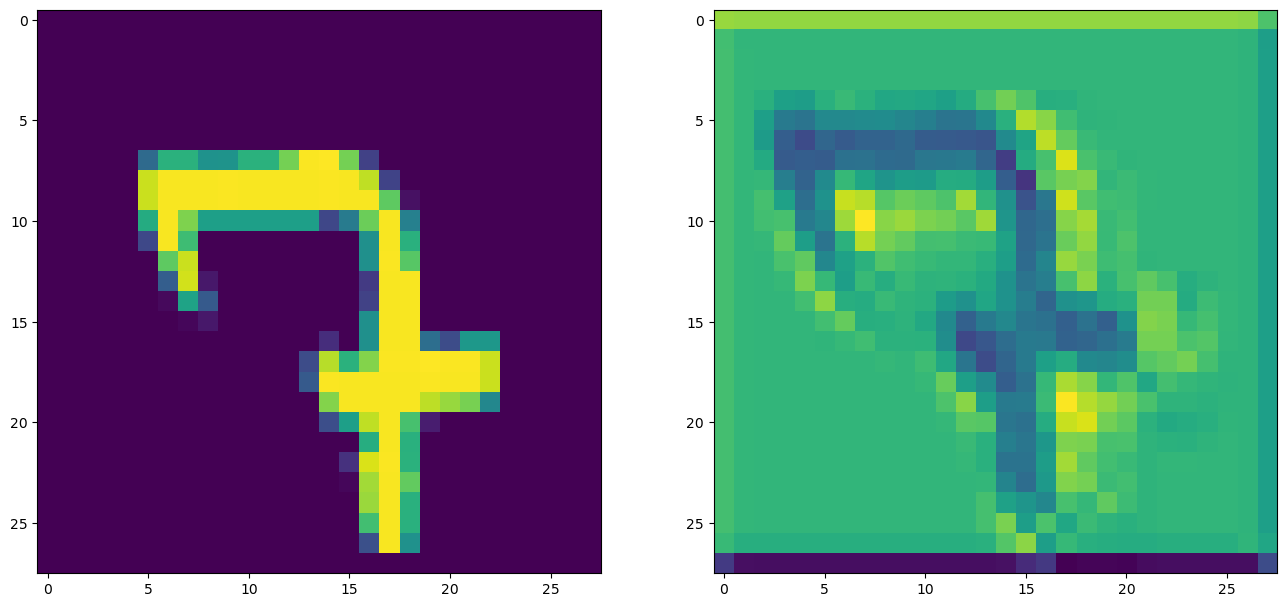

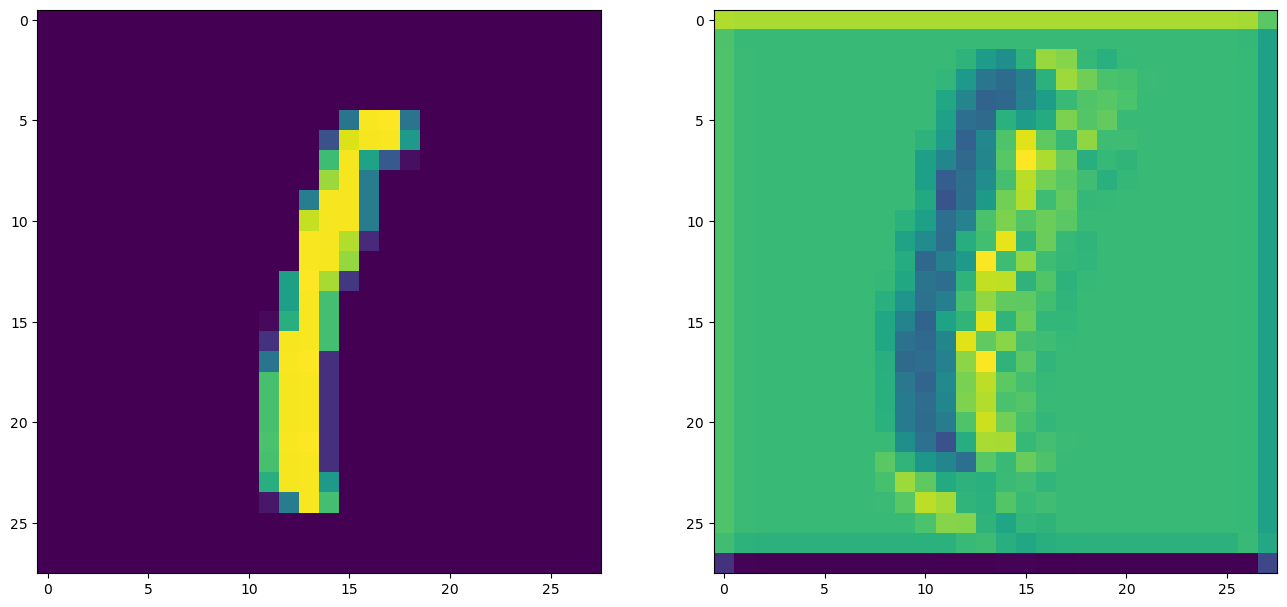

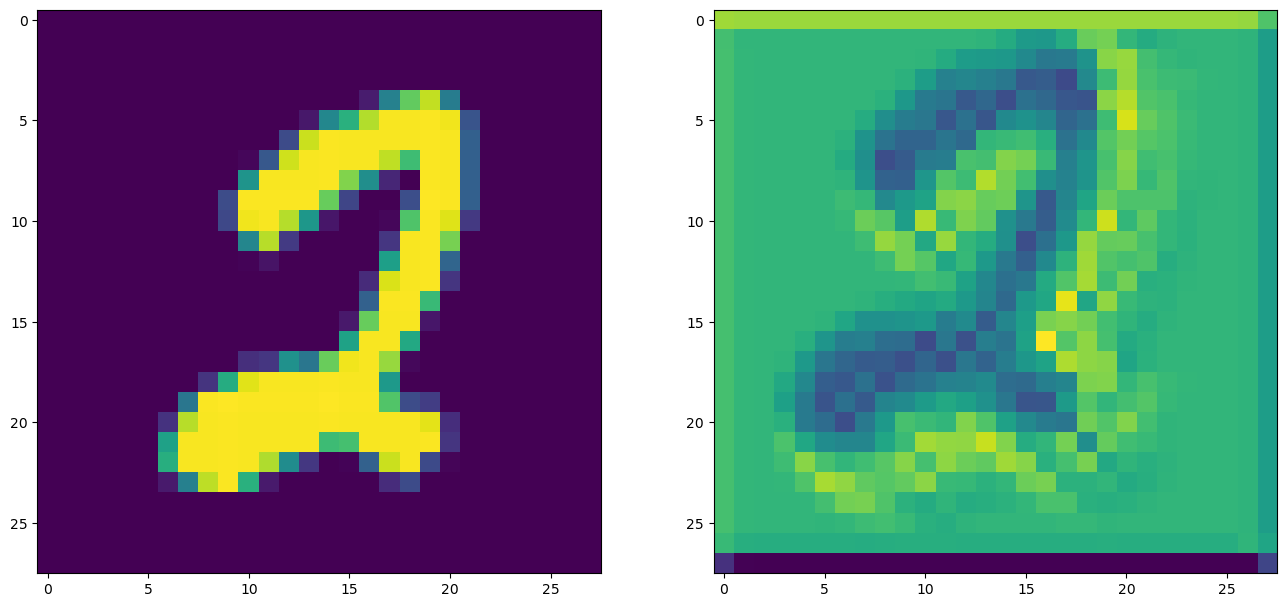

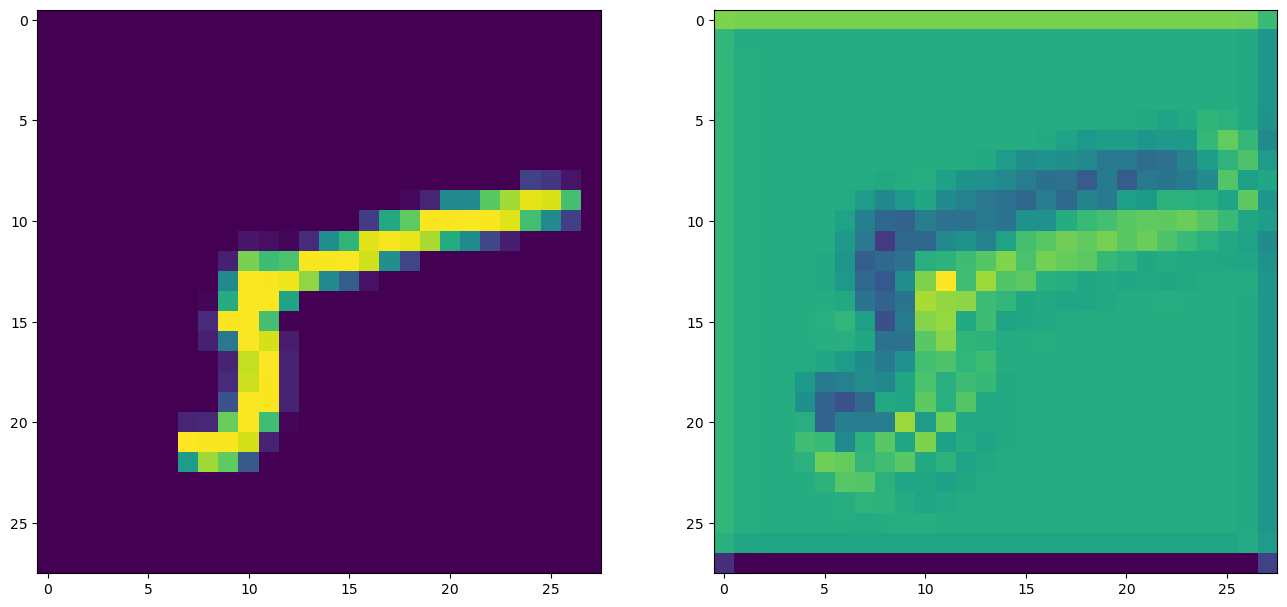

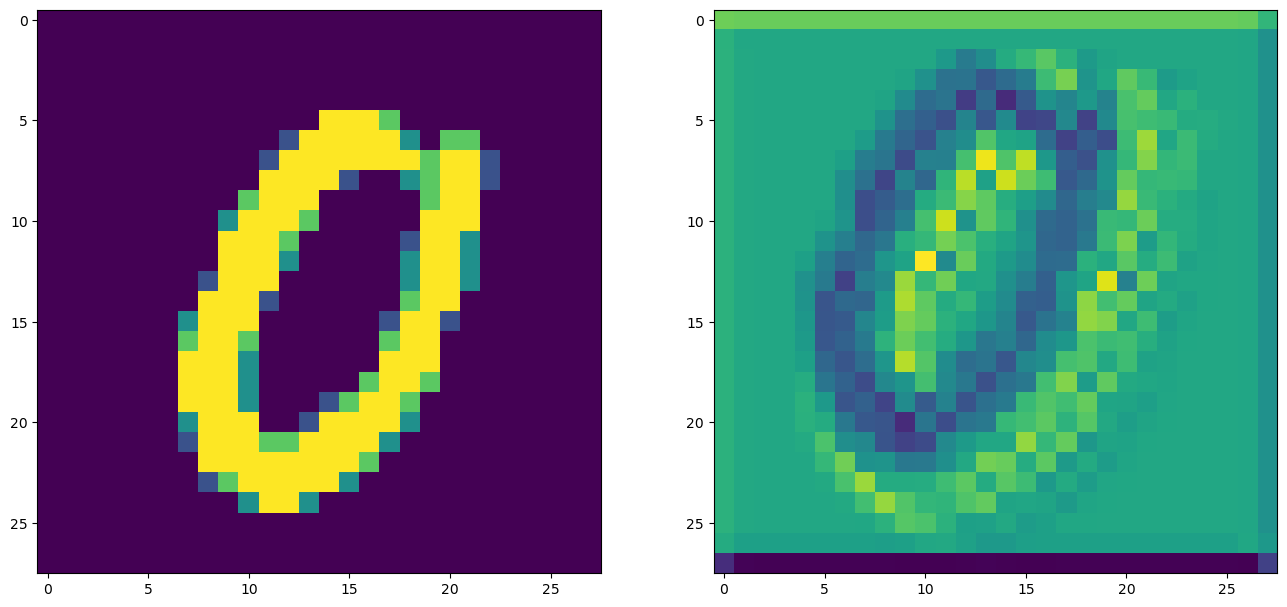

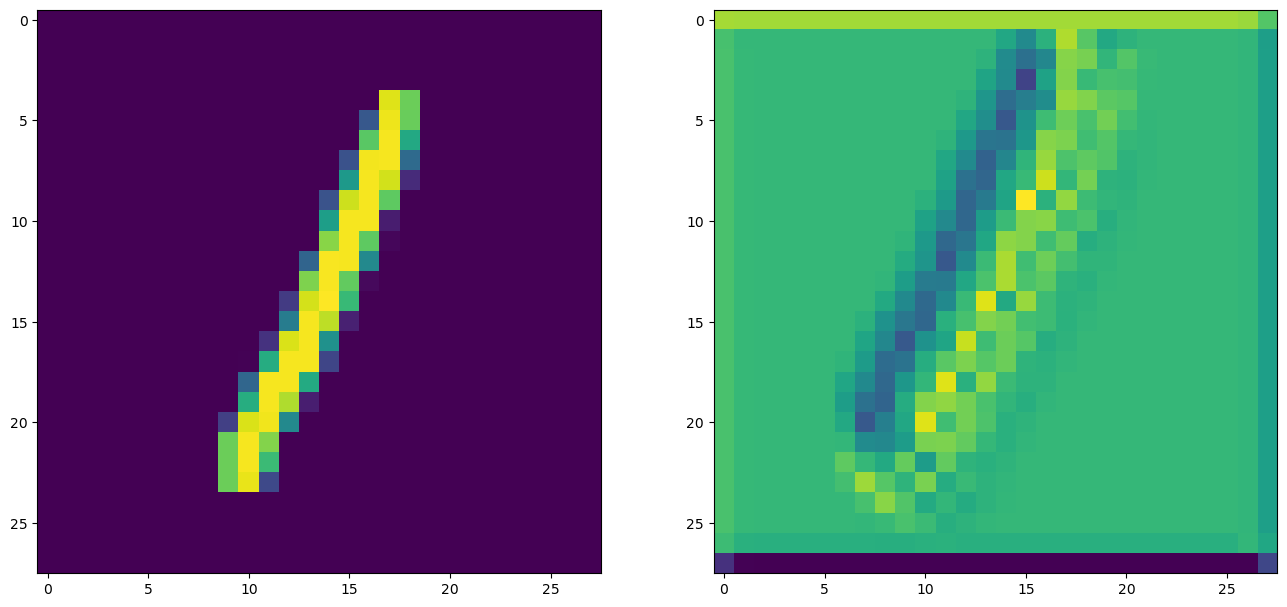

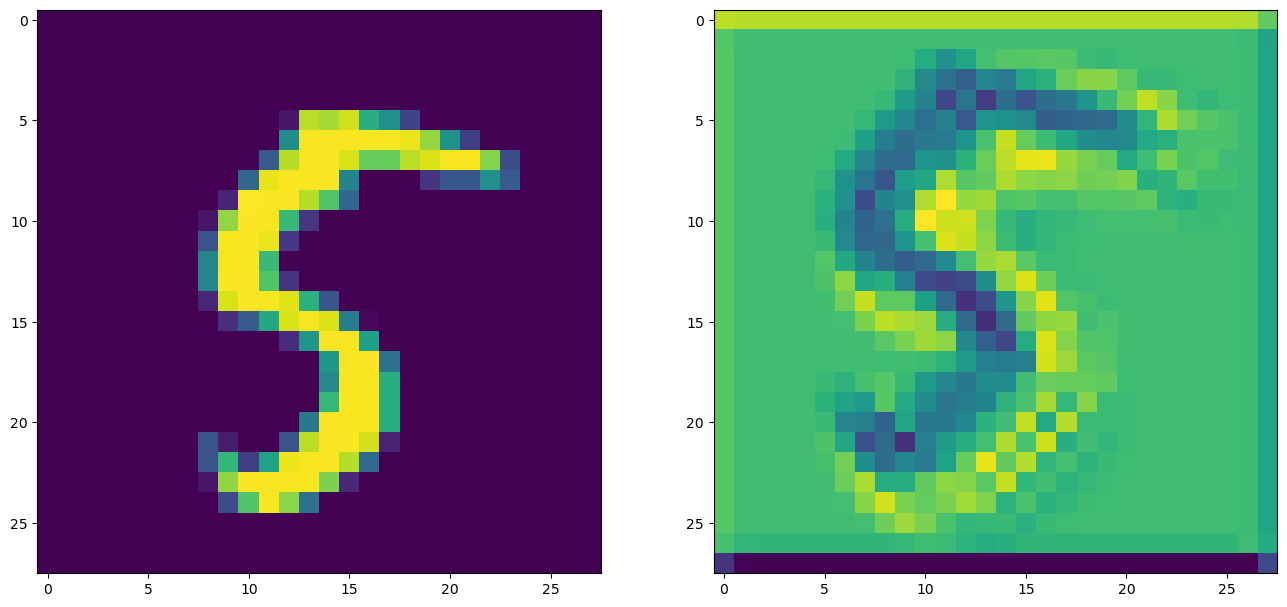

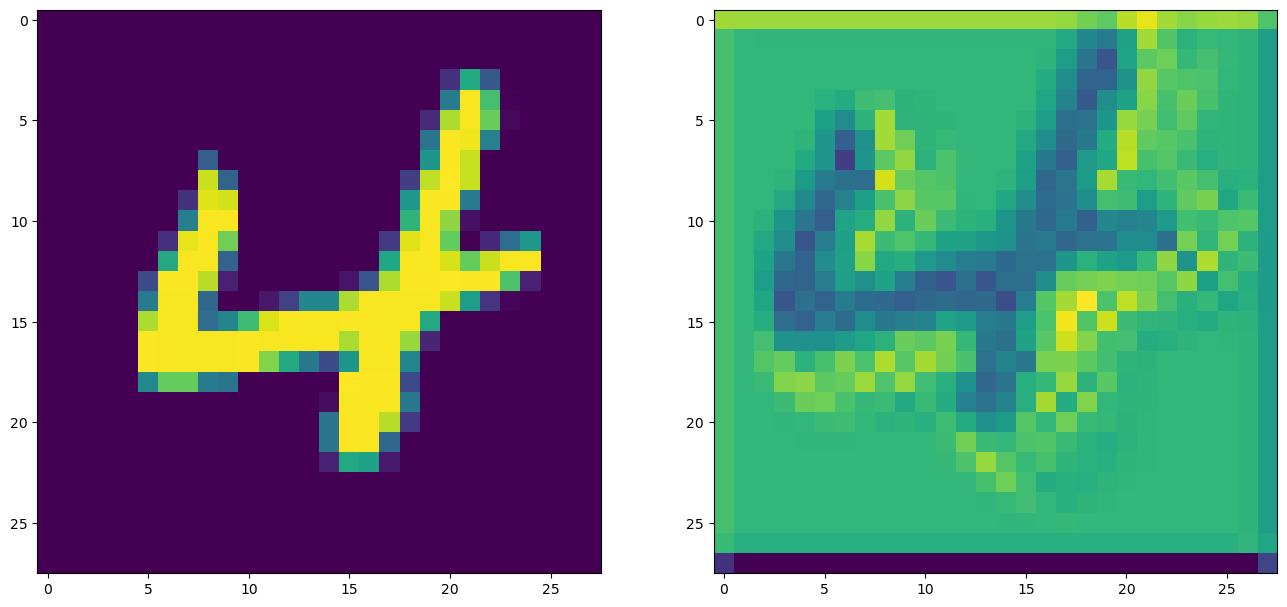

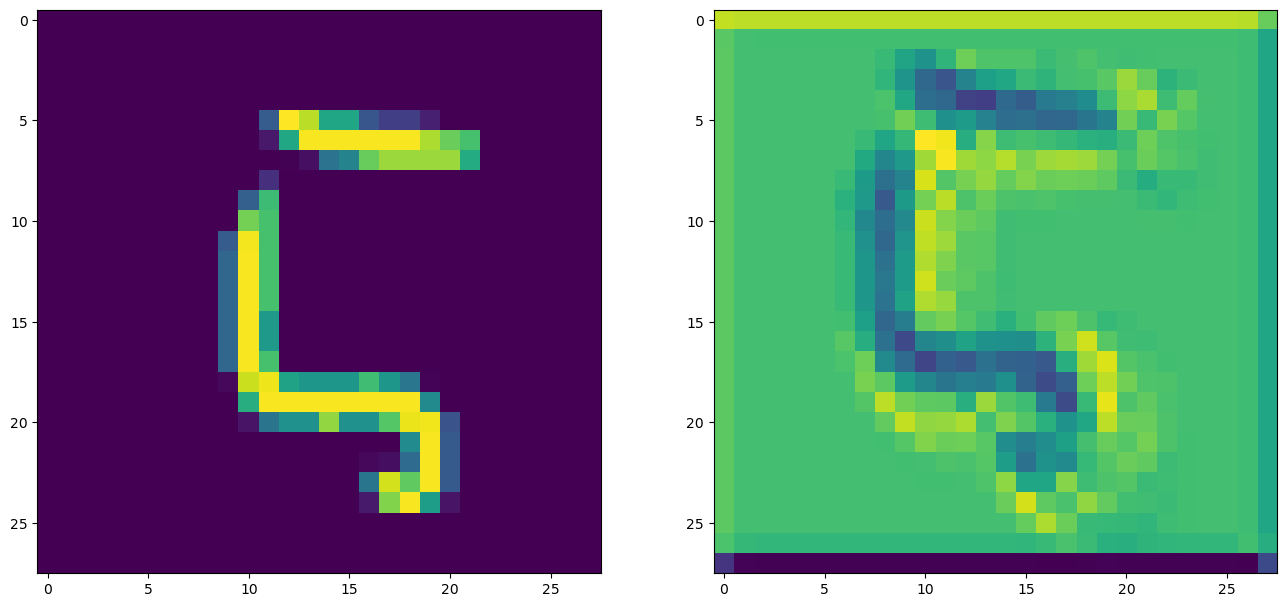

In [11]:
print(len(input_im))
print(len(output_im))
print(input_im[0].shape)

for i in range(10):
    im_x = input_im[0][i].detach().numpy()
    im_y = output_im[0][i].detach().numpy()
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(im_x.reshape(28, 28))
    
    ax[1].imshow(im_y.reshape(28, 28))

Text(0.5, 1.0, 'MSE')

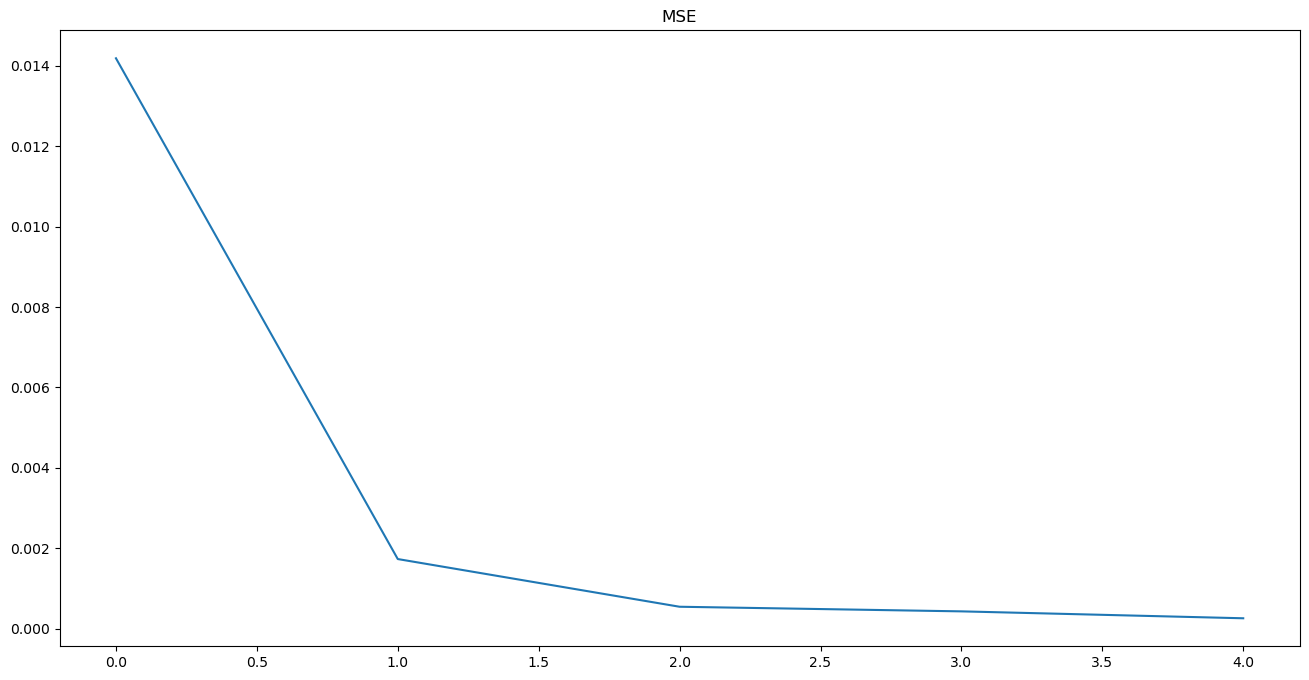

In [12]:
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.plot(train_loss)
ax.set_title("MSE")

[W417 14:11:02.632328460 NNPACK.cpp:62] Could not initialize NNPACK! Reason: Unsupported hardware.


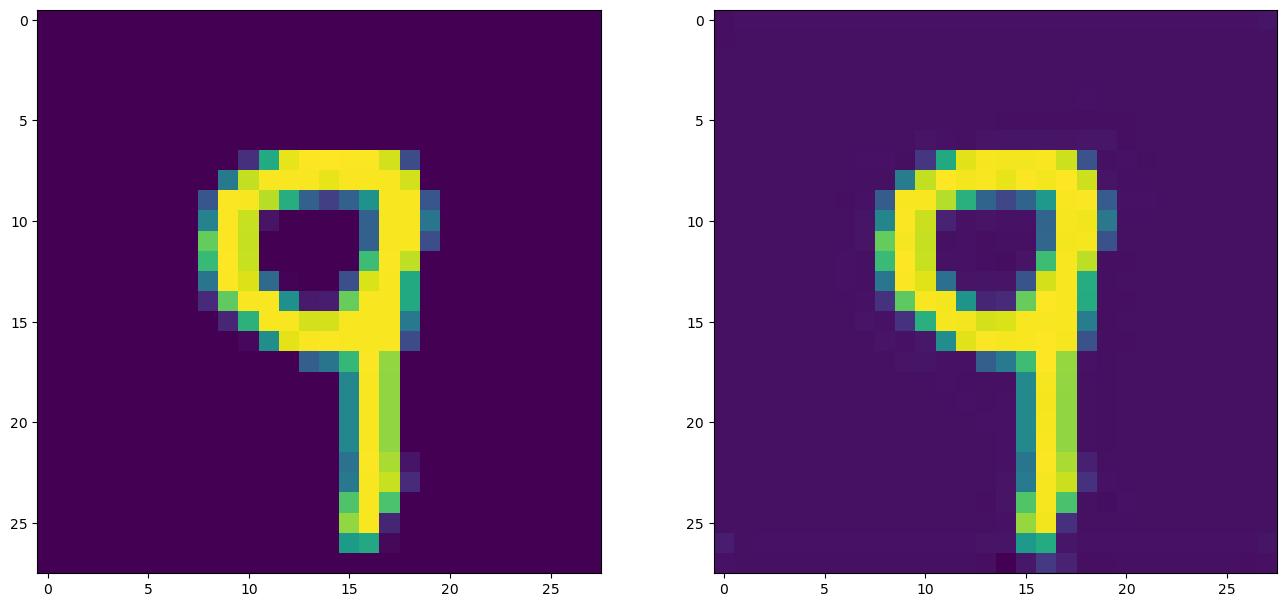

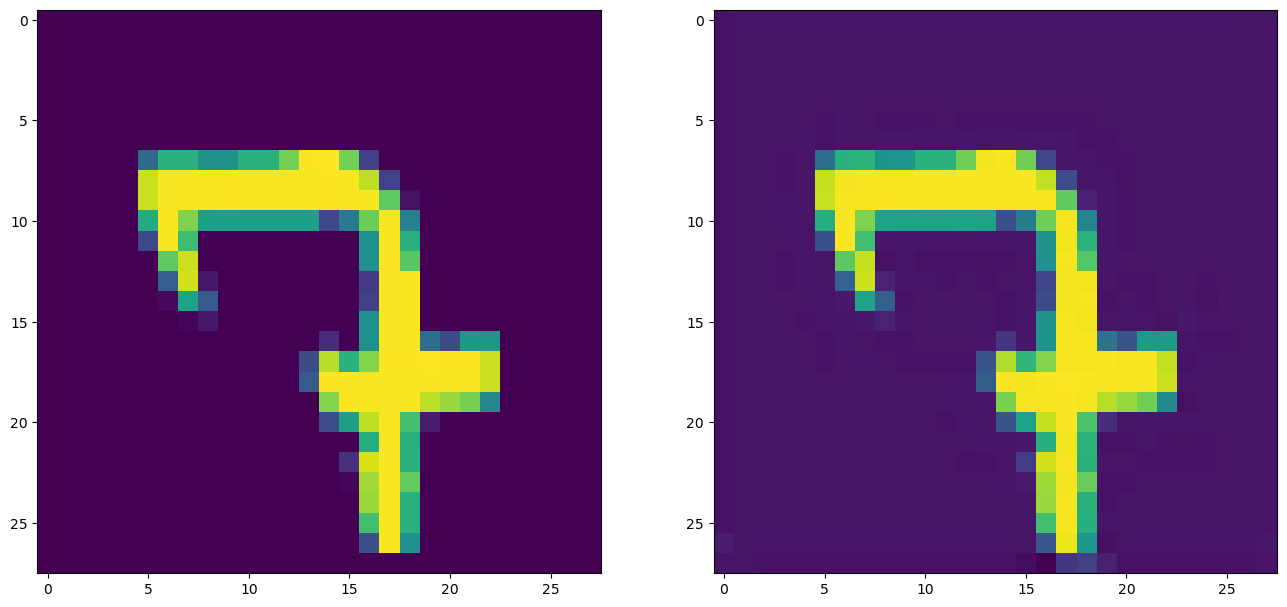

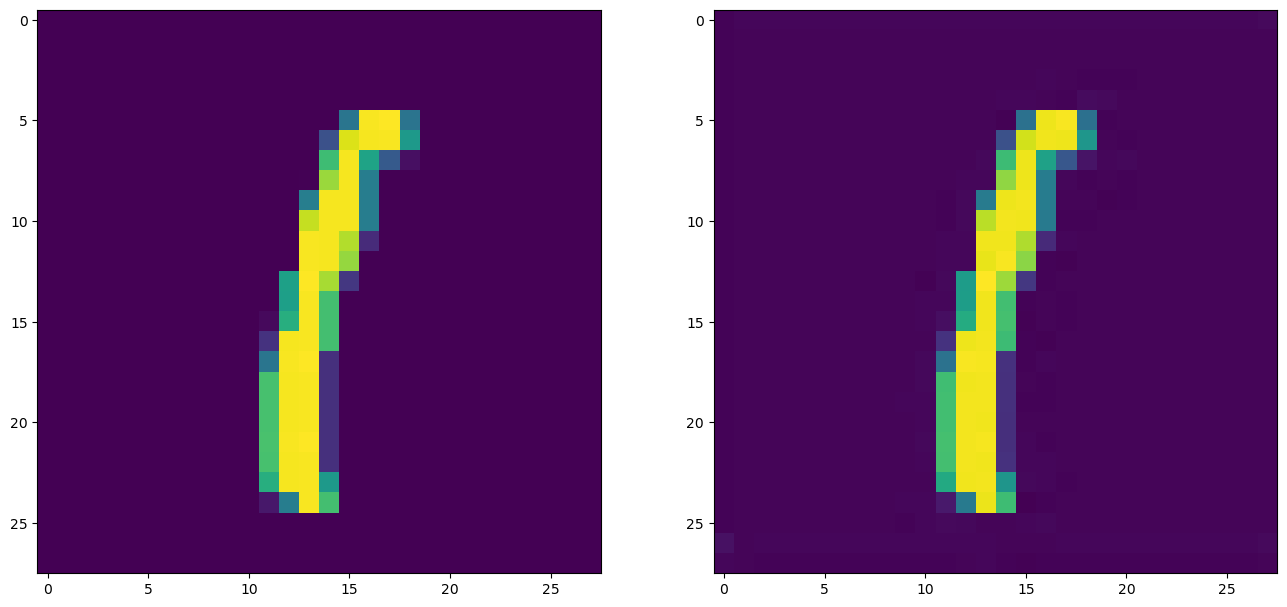

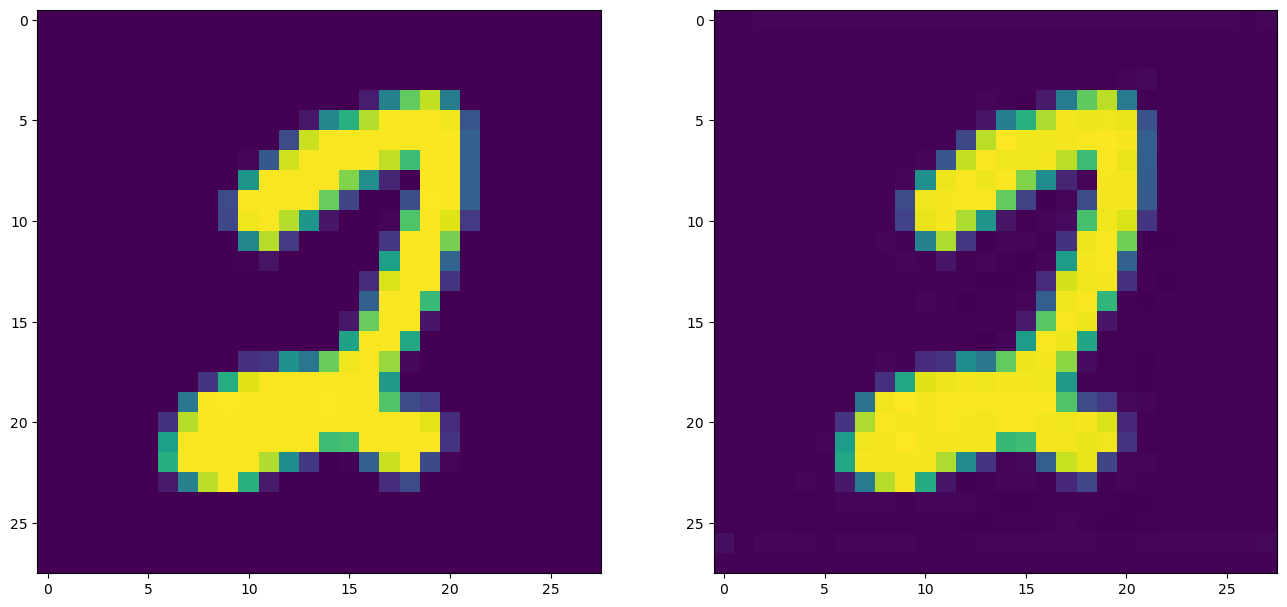

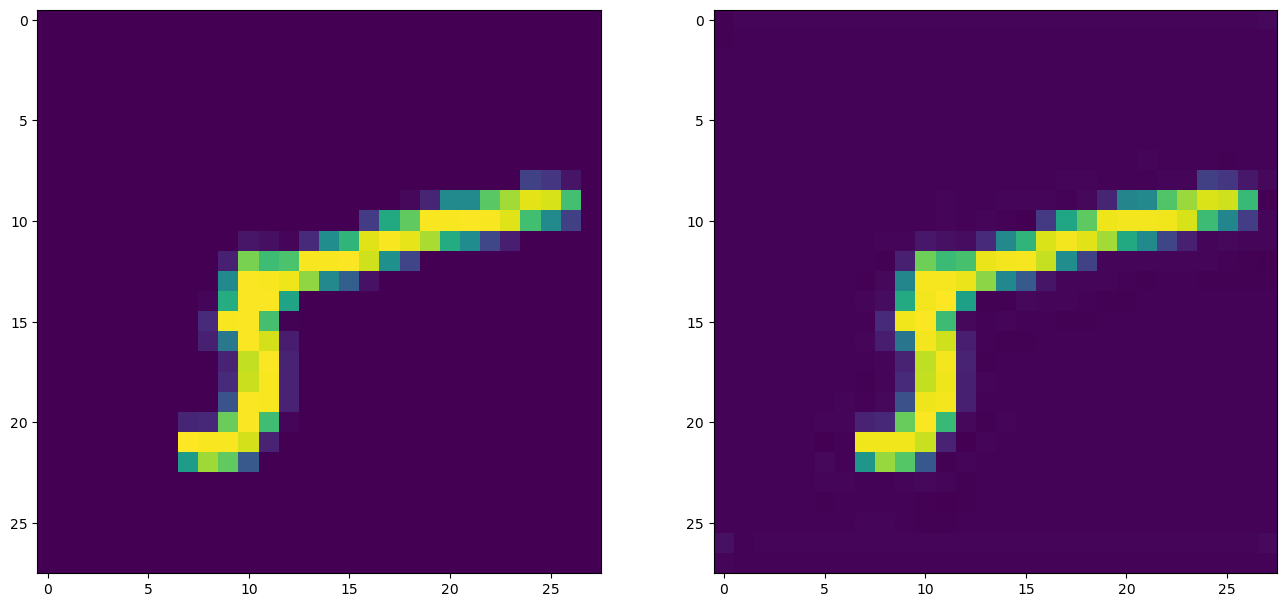

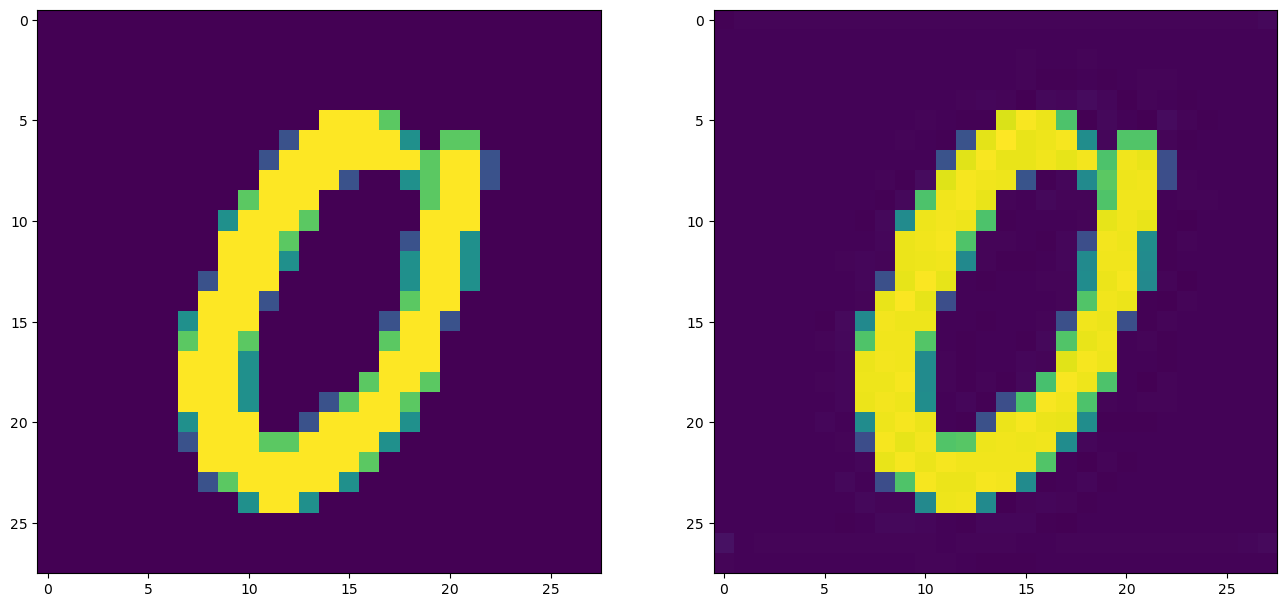

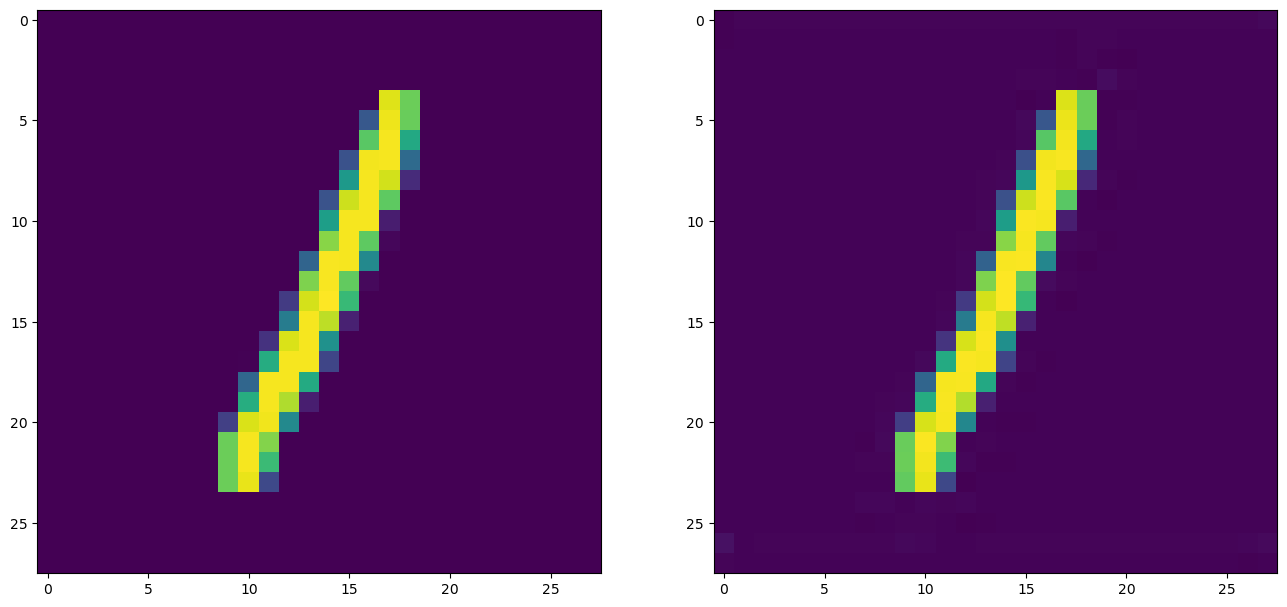

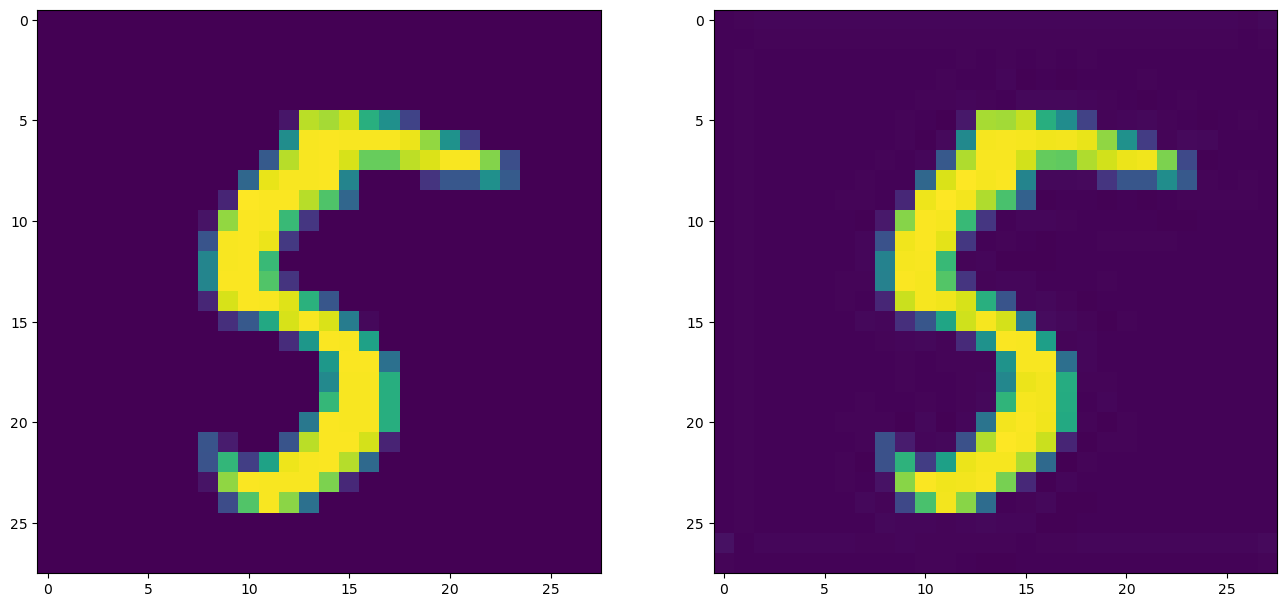

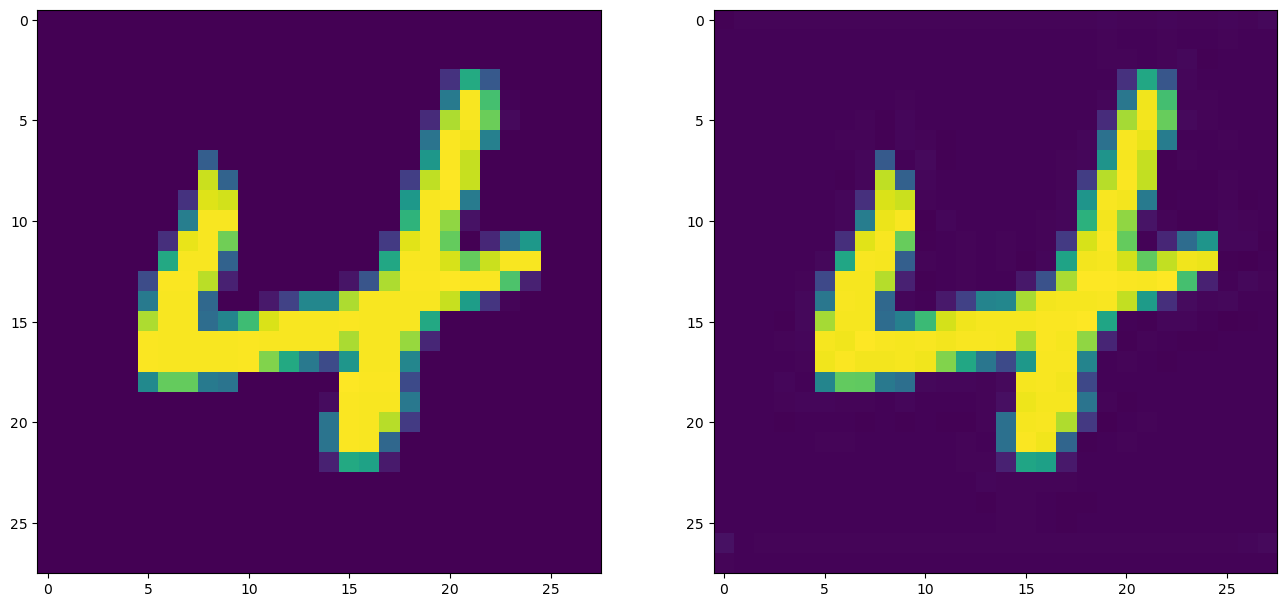

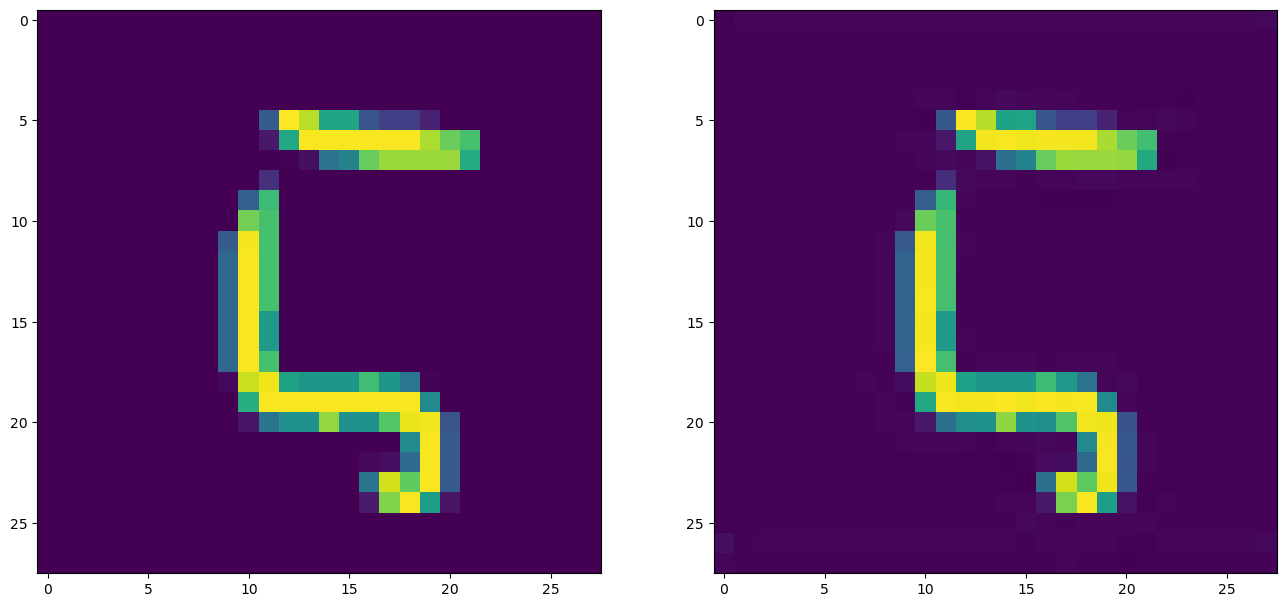

In [13]:
for i in range(10):
    y_pred = model(input_im[0][i])

    im_x = input_im[0][i].detach().numpy()
    im_y = y_pred.detach().numpy()
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(im_x.reshape(28, 28))
    
    ax[1].imshow(im_y.reshape(28, 28))

In [ ]:
# predicted_labels = []
# real_labels = []
# model.eval()
# with torch.no_grad():
#     for batch in train_data_loader:
#         y_predicted = model(batch[0].reshape(-1, 784))
#         predicted_labels.append(y_predicted.argmax(dim=1))
#         real_labels.append(batch[1])

# predicted_labels = torch.cat(predicted_labels)
# real_labels = torch.cat(real_labels)
# train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
# print(f"Neural network accuracy on train set: {train_acc:3.5}")

In [ ]:
# predicted_labels = []
# real_labels = []
# model.eval()
# with torch.no_grad():
#     for batch in test_data_loader:
#         y_predicted = model(batch[0].reshape(-1, 784))
#         predicted_labels.append(y_predicted.argmax(dim=1))
#         real_labels.append(batch[1])

# predicted_labels = torch.cat(predicted_labels)
# real_labels = torch.cat(real_labels)
# test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
# print(f"Neural network accuracy on test set: {test_acc:3.5}")